In [37]:
import numpy as np
from sympy import legendre
from sympy import Piecewise, symbols, lambdify, integrate, Rational
import matplotlib.pyplot as plt
from tqdm import tqdm

In [45]:
degree = 40

In [46]:
x = symbols("x")
f = Piecewise((0, (x >= -1) & (x < 0)), (1, (x >= 0) & (x <= 1)))
f_eval = lambdify(x, f)

coefs = []

for j in range(degree+1):

    C = Rational(2*j + 1, 2) * integrate(f * legendre(j, x), (x, -1, 1))

    coefs.append(C)

S_n = coefs[0]*legendre(0, x)

for j in range(1, degree+1):

    S_n += coefs[j]*legendre(j, x)

S_n_eval = lambdify(x, S_n)

t = np.linspace(-1.5, 1.5, 1000)

L2_norm = (f-S_n)**2

error = integrate(L2_norm, (x, -1, 1))


In [47]:
float(error)

0.007858904657103061

In [48]:
t = np.linspace(-1, 1, 10000)

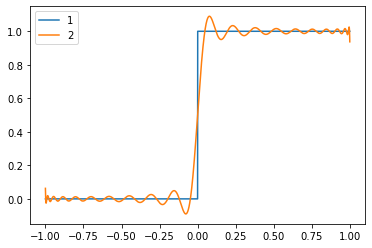

In [50]:
fig, ax = plt.subplots()
ax.plot(t, f_eval(t))
ax.plot(t, S_n_eval(t))
ax.legend(["1", "2"])
plt.show()